In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [3]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.166473
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.101009
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.986450
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.002816
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.970086


In [15]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close,simple_return,log_return
Date,,,,,,,,
2021-03-15,129.039993,127.190002,128.389999,128.559998,7172600.0,128.559998,0.003278,0.003272
2021-03-16,129.979996,128.509995,128.509995,128.940002,6417100.0,128.940002,0.002956,0.002951
2021-03-17,129.839996,128.350006,129.110001,128.419998,6179300.0,128.419998,-0.004033,-0.004041
2021-03-18,129.039993,127.040001,128.210007,128.699997,6866200.0,128.699997,0.002180,0.002178
2021-03-19,129.740005,127.900002,129.100006,128.009995,20034500.0,128.009995,-0.005361,-0.005376


In [16]:
PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print(PG['simple_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2021-03-15    0.003278
2021-03-16    0.002956
2021-03-17   -0.004033
2021-03-18    0.002180
2021-03-19   -0.005361
Name: simple_return, Length: 6600, dtype: float64


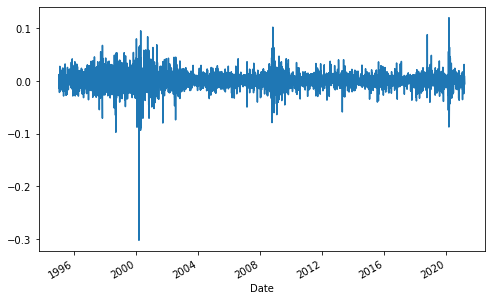

In [17]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [18]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005191610132594874

In [19]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.12979025331487187

In [20]:
print(str(round(avg_returns_a, 5) * 100) + ' %')

12.979 %


In [21]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2021-03-15    0.003272
2021-03-16    0.002951
2021-03-17   -0.004041
2021-03-18    0.002178
2021-03-19   -0.005376
Name: log_return, Length: 6600, dtype: float64


In [22]:
log_return_d = PG['log_return'].mean() * 250
log_return_d

0.10426091760292297

In [23]:
log_return_a = PG['log_return'].mean() * 250
log_return_a

0.10426091760292297

In [24]:
print(str(round(log_return_a, 5) * 100) + ' %')

10.426 %


In [34]:
import numpy as np 
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [35]:
tickers=['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']


In [36]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6600 entries, 1995-01-03 to 2021-03-19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6600 non-null   float64
 1   MSFT    6600 non-null   float64
 2   F       6600 non-null   float64
 3   GE      6600 non-null   float64
dtypes: float64(4)
memory usage: 257.8 KB


In [29]:
log_return_d


0.10426091760292297

In [37]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.166473,2.389259,4.380183,4.119593
1995-01-04,8.101009,2.406627,4.498034,4.119593
1995-01-05,7.986450,2.366929,4.458752,4.129690
1995-01-06,8.002816,2.406627,4.458752,4.109495
1995-01-09,7.970086,2.391740,4.537320,4.069108


In [39]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-03-15,128.559998,234.809998,13.20,13.35
2021-03-16,128.940002,237.710007,12.49,13.15
2021-03-17,128.419998,237.039993,12.69,13.61
2021-03-18,128.699997,230.720001,12.49,13.25
2021-03-19,128.009995,230.350006,12.83,13.22


In [40]:
mydata.iloc[0]

PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

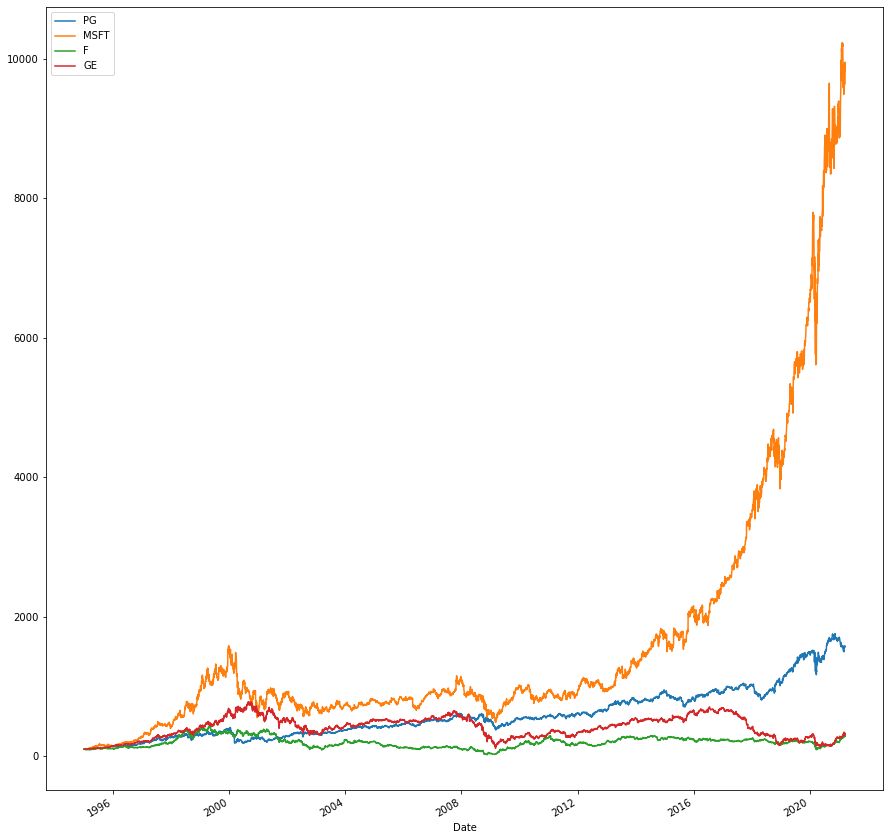

In [43]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 16));
plt.show()

In [45]:
mydata.loc['1995-01-03']

PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

In [46]:
mydata.iloc[0]

PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

In [47]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [48]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [49]:
np.dot(returns, weights)

array([        nan,  0.00653957, -0.00922966, ...,  0.01103556,
       -0.01667333,  0.00449817])

In [50]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.129790
MSFT    0.222935
F       0.120380
GE      0.095794
dtype: float64

In [51]:
np.dot(annual_returns, weights)

0.14222489863209603

In [53]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '% '
print(pfolio_1)

14.222000000000001% 


In [54]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [57]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + ' %'
print(pfolio_1)
print(pfolio_2)

14.222000000000001% 
16.394000000000002 %


In [78]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']

In [79]:
ind_data = pd.DataFrame()

In [80]:
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [81]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [82]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-03-15,3968.939941,13459.709961,14461.419922
2021-03-16,3962.709961,13471.570312,14557.580078
2021-03-17,3974.120117,13525.200195,14596.610352
2021-03-18,3915.459961,13116.169922,14775.519531
2021-03-19,3913.100098,13215.240234,14621.000000


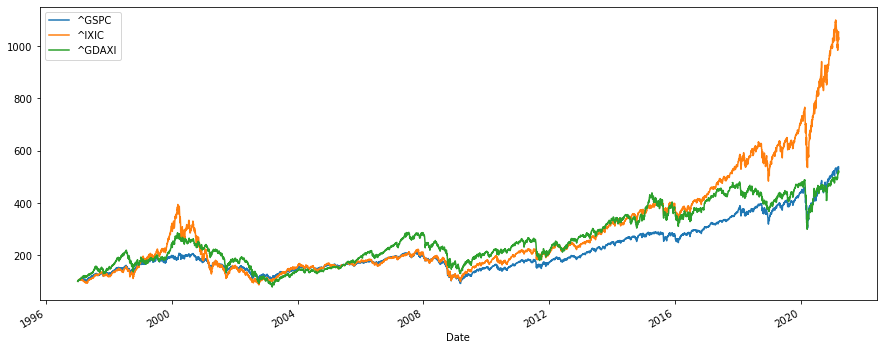

In [83]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6))
plt.show()

In [84]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

In [85]:
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-03-15,0.006492,0.010499,-0.002825
2021-03-16,-0.001570,0.000881,0.006649
2021-03-17,0.002879,0.003981,0.002681
2021-03-18,-0.014761,-0.030242,0.012257
2021-03-19,-0.000603,0.007553,-0.010458


In [86]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.087873
^IXIC     0.127520
^GDAXI    0.080645
dtype: float64

In [88]:
tickers = ['PG', '^GSPC', '^DJI']
data_2 = pd.DataFrame()
for t in tickers: data_2[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [89]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2021-03-15,128.559998,3968.939941,32953.460938
2021-03-16,128.940002,3962.709961,32825.949219
2021-03-17,128.419998,3974.120117,33015.371094
2021-03-18,128.699997,3915.459961,32862.300781
2021-03-19,128.009995,3913.100098,32627.970703


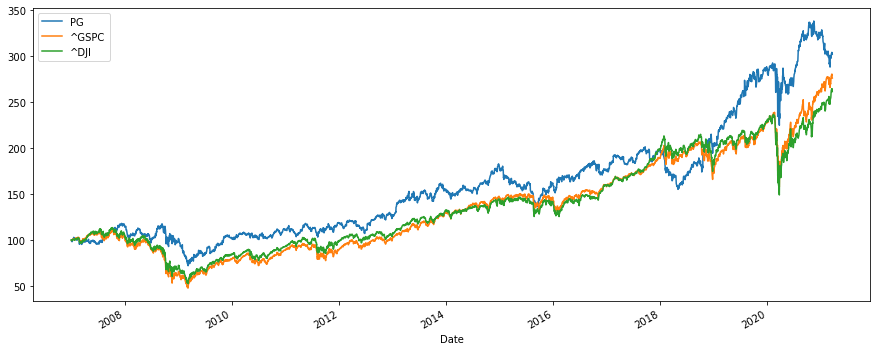

In [91]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15, 6));
plt.show()